In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, make_scorer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("secom_rf.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [3]:
df

,Pass/Fail,v0,v10,v100,v102,v103,v104,v106,v107,v11,...,v71,v75,v77,v78,v80,v81,v82,v83,v88,v99
0,0,0.212406,-0.330435,0.50,1.962264,1.638889,0.375,-0.078431,-2.545642,-1.569231,...,-0.663565,0.732305,0.625072,-0.285223,0.129719,-2.466145,-0.251416,-0.373801,-0.957169,-0.421141
1,0,0.933964,-1.321739,-1.00,-1.088534,1.555556,0.250,-0.078431,0.796287,-0.246154,...,-0.725669,0.092770,0.267370,-0.513746,-0.052275,-1.195242,-0.113250,-0.968189,1.900498,-0.265101
2,0,-0.257246,-0.321739,-0.50,-1.011611,1.166667,0.375,0.745098,-0.498195,-0.230769,...,-1.160797,-1.907230,-0.787461,0.929553,-1.854792,1.513788,0.475651,0.168939,-0.887422,-0.327181
3,0,0.226982,-0.660870,1.00,1.013062,1.555556,0.250,-0.078431,-0.824136,-0.692308,...,-1.318298,-1.825834,-0.179105,-0.529210,-0.164569,0.503754,-0.260476,0.037943,0.297121,-0.280201
4,0,-0.729791,0.443478,-0.50,0.387518,1.361111,0.750,0.078431,-2.682826,0.307692,...,-1.155706,1.011375,0.230816,0.115120,-1.471442,0.584022,0.323896,-1.045228,0.363048,-0.703020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1,-0.260918,-0.026087,0.50,0.767779,-0.194444,0.625,-0.431373,-1.112945,0.100000,...,0.360869,-0.089400,-0.643857,0.809278,0.021297,-0.191898,-0.480181,-0.982760,-1.714807,-0.577181
1563,1,0.457747,-0.539130,2.50,-0.635704,1.055556,0.625,-0.470588,-0.846828,0.538462,...,0.381210,9.216801,-0.395816,2.130584,0.168441,0.456932,0.169875,-0.162880,1.015825,-0.671141
1564,1,-0.667594,-0.373913,0.00,-0.341074,-0.361111,-0.500,0.431373,-0.157813,0.930769,...,0.073369,-0.050640,-0.578583,0.728522,0.040658,0.831514,-0.070215,0.615163,2.276824,0.500000
1565,1,1.795160,-0.530435,0.75,0.557329,0.416667,-0.750,0.666667,-1.129448,0.930769,...,2.833710,0.666414,-0.544641,-0.587629,0.363988,0.309774,-1.832390,-1.297410,-1.327305,0.686242


In [4]:
X = df.drop("Pass/Fail", axis=1)
y = df["Pass/Fail"].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify = y)

In [6]:
from sklearn.model_selection import train_test_split

## SMOTE

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)
# train 데이터에서 오버샘플링 시키기
x_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 오버샘플링 적용 후 데이터 레이블 개수 살펴보기
print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', x_train_over.shape, y_train_over.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_train_over).value_counts())

오버샘플링 전 : (1253, 165) (1253,)

오버샘플링 후 : (2340, 165) (2340,)

오버샘플링 전 레이블 분포 :
 0    1170
1      83
dtype: int64

오버샘플링 후 레이블 분포 :
 1    1170
0    1170
dtype: int64


Class=0, n=1170 (74.665%)
Class=1, n=83 (5.297%)


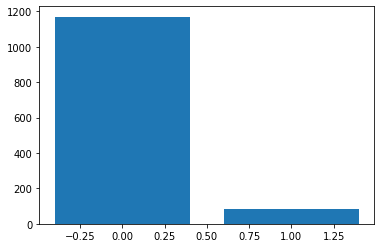

In [8]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
#plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=1170 (74.665%)
Class=1, n=1170 (74.665%)


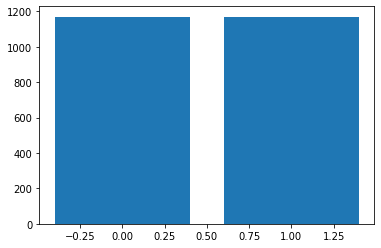

In [9]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train_over)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [10]:
df=pd.DataFrame(y_train_over)
df.columns = ['Pass/Fail']
df=pd.concat([df,x_train_over], axis=1)
df

,Pass/Fail,v0,v10,v100,v102,v103,v104,v106,v107,v11,...,v71,v75,v77,v78,v80,v81,v82,v83,v88,v99
0,0,0.706314,-0.086957,0.750000,0.114659,0.055556,-0.875000,0.313725,-0.084580,0.607692,...,-0.211969,-0.008005,-0.667356,1.372852,-0.354308,0.624156,1.048698,0.354469,-0.502602,0.904362
1,0,0.664701,-1.113043,-0.500000,2.449927,0.888889,-0.750000,-1.529412,0.715833,-0.469231,...,-0.118227,0.565639,0.692957,-0.154639,0.001936,0.042216,0.518686,1.409363,-0.125394,0.703020
2,0,0.063310,0.417391,0.250000,0.571843,-0.277778,-1.750000,-0.156863,0.967509,0.123077,...,-1.463457,0.472615,0.259537,0.077320,-1.407551,1.466965,-0.174405,0.135757,0.960511,1.716443
3,0,-1.226370,0.495652,-0.250000,0.081277,0.027778,1.875000,3.725490,-0.123775,1.353846,...,0.669374,0.546259,1.982774,0.702749,-0.667957,-2.405945,0.935447,0.196350,-1.455262,-1.904362
4,0,-0.325452,0.017391,1.250000,0.651669,1.027778,-2.125000,0.117647,0.222795,0.869231,...,0.179928,-0.166920,-0.299210,-0.307560,1.357212,0.637534,0.305776,-0.556301,-0.422207,2.137584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,1,1.594341,-0.479955,0.679205,0.289355,0.428466,-0.608409,0.677772,-0.905853,0.830567,...,2.442260,0.596167,-0.316173,-0.687375,0.093143,0.336293,-1.700260,-0.932377,-1.086713,0.551540
2336,1,-0.580623,-1.301433,0.447306,-0.122556,0.399036,-0.598653,-0.284795,0.559954,0.511185,...,-0.853866,1.159841,0.442004,-1.037632,-2.072003,-0.038974,-1.283722,-0.178251,0.919805,0.616274
2337,1,0.711245,0.628446,1.472996,0.571531,0.569272,0.746142,0.948320,-2.958426,-0.217950,...,0.028200,0.411283,0.658878,-0.537847,-1.443914,-0.002336,0.780414,-1.092567,-0.093329,-0.699628
2338,1,0.422586,0.129052,0.650588,-0.522606,0.975085,0.940353,0.684512,0.507280,0.517332,...,2.642381,1.032707,-0.454411,-0.079279,0.464914,0.873715,-1.357547,-0.946252,0.438360,-0.971889


In [11]:
feature_columns = df.columns.difference(["Pass/Fail"])
x = df[feature_columns]
y = df[["Pass/Fail"]]
train_x, test_x ,train_y, test_y = train_test_split(x, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1638, 165) (702, 165) (1638, 1) (702, 1)


In [12]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier()
tree.fit(train_x, train_y)
print('학습용 데이터셋 정확도 : %.2f' % log.score(train_x, train_y))
print('검증용 데이터셋 정확도 : %.2f' % log.score(test_x, test_y))

NameError: name 'log' is not defined

In [96]:
from sklearn.metrics import classification_report
y_pred=log.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.87       351
           1       0.84      0.92      0.88       351

    accuracy                           0.87       702
   macro avg       0.88      0.87      0.87       702
weighted avg       0.88      0.87      0.87       702



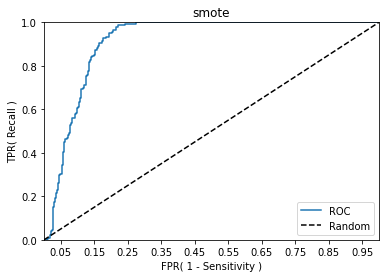

In [97]:
def roc_curve_plot(test_y , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(test_y ,pred_proba_c1)

  
    plt.plot(fprs , tprs, label='ROC')
   
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  

    plt.title('smote')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
  
roc_curve_plot(test_y, log.predict_proba(test_x)[:, 1] )

## ADASYN
#### SMOTE의 개선된 버전이다. 동일한 프로세스를 진행한 후 점들에 임의의 작은 값을 더해줌으로써 조금 더 사실적인 데이터가 생성된다. 즉 모든 표본이 약간 더 분산된다.

In [98]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE

print('Original dataset shape %s' % Counter(y_train))

ada = ADASYN(random_state=12)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', X_res.shape, y_res.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_res).value_counts())

Original dataset shape Counter({0: 1170, 1: 83})
Resampled dataset shape Counter({0: 1170, 1: 1168})
오버샘플링 전 : (1253, 165) (1253,)

오버샘플링 후 : (2338, 165) (2338,)

오버샘플링 전 레이블 분포 :
 0    1170
1      83
dtype: int64

오버샘플링 후 레이블 분포 :
 0    1170
1    1168
dtype: int64


In [99]:
df=pd.DataFrame(y_res)
df.columns = ['Pass/Fail']
df=pd.concat([df,X_res], axis=1)
df

,Pass/Fail,v0,v10,v100,v102,v103,v104,v106,v107,v11,...,v71,v75,v77,v78,v80,v81,v82,v83,v88,v99
0,0,0.706314,-0.086957,0.750000,0.114659,0.055556,-0.875000,0.313725,-0.084580,0.607692,...,-0.211969,-0.008005,-0.667356,1.372852,-0.354308,0.624156,1.048698,0.354469,-0.502602,0.904362
1,0,0.664701,-1.113043,-0.500000,2.449927,0.888889,-0.750000,-1.529412,0.715833,-0.469231,...,-0.118227,0.565639,0.692957,-0.154639,0.001936,0.042216,0.518686,1.409363,-0.125394,0.703020
2,0,0.063310,0.417391,0.250000,0.571843,-0.277778,-1.750000,-0.156863,0.967509,0.123077,...,-1.463457,0.472615,0.259537,0.077320,-1.407551,1.466965,-0.174405,0.135757,0.960511,1.716443
3,0,-1.226370,0.495652,-0.250000,0.081277,0.027778,1.875000,3.725490,-0.123775,1.353846,...,0.669374,0.546259,1.982774,0.702749,-0.667957,-2.405945,0.935447,0.196350,-1.455262,-1.904362
4,0,-0.325452,0.017391,1.250000,0.651669,1.027778,-2.125000,0.117647,0.222795,0.869231,...,0.179928,-0.166920,-0.299210,-0.307560,1.357212,0.637534,0.305776,-0.556301,-0.422207,2.137584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,1,0.465080,0.082419,-0.050798,-0.829718,0.850931,-0.351596,-0.080622,-0.147226,0.533130,...,0.296715,0.018725,0.852173,-1.284861,0.370630,0.658028,-0.520399,-0.361770,-0.239007,0.307223
2334,1,0.113740,0.274199,-0.109286,0.105922,1.192777,-0.609286,-0.241178,-0.433112,0.389924,...,-0.009062,-0.263813,-0.078346,-1.028621,1.642910,0.561318,-0.293758,-1.104521,-0.311811,0.550250
2335,1,-0.682382,0.316990,0.164103,1.273283,1.405414,-0.335897,0.509303,-0.220491,-0.287240,...,-0.896076,-0.617735,-1.607328,-0.540090,1.645027,0.166321,-0.340820,-0.434330,0.332773,0.286034
2336,1,0.462764,0.075690,-0.042902,-0.842989,0.841719,-0.335804,-0.058947,-0.131556,0.524991,...,0.290739,0.022703,0.857863,-1.285050,0.320242,0.653802,-0.530343,-0.318655,-0.222971,0.292200


In [100]:
feature_columns = df.columns.difference(["Pass/Fail"])
x = df[feature_columns]
y = df[["Pass/Fail"]]
train_x, test_x ,train_y, test_y = train_test_split(x, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1636, 165) (702, 165) (1636, 1) (702, 1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier()
tree.fit(train_x, train_y)
print('학습용 데이터셋 정확도 : %.2f' % log.score(train_x, train_y))
print('검증용 데이터셋 정확도 : %.2f' % log.score(test_x, test_y))

In [ ]:
from sklearn.metrics import classification_report
y_pred=log.predict(test_x)
print(classification_report(test_y, y_pred))

In [ ]:
def roc_curve_plot(test_y , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(test_y ,pred_proba_c1)

  
    plt.plot(fprs , tprs, label='ROC')
   
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  

    plt.title('ADAYSN')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
  
roc_curve_plot(test_y, log.predict_proba(test_x)[:, 1] )